<a href="https://colab.research.google.com/github/BungPeerapat/Python_AI_Learn/blob/main/Data_Research_editPath_and_printImagesInFolder_deleteFiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install botnoi==0.2.1

In [ ]:
from botnoi import scrape as sc
from botnoi import cv
import os

# Mount Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ทำการ query

In [ ]:
# กำหนดตัวแปร query = ชื่อของข้อมูลที่ต้องการค้นหา
# กำหนดชื่อ className = ชื่อโฟลเดอร์กับชื่อรูปที่เราต้องการจัดเก็บ

query = 'Pachyrhizus erosus L. Urb.'
className = 'Pachyrhizus erosus'

In [ ]:
imgList = sc.get_image_urls(query,120) #เลขข้างหลัง เป็นการกำหนด range ของรูปภาพที่เราจะค้นหานะครับ ถ้าอยากได้ 50 รูปก็สามารถเปลี่ยนเลขข้างหลัง จาก 100 เป็น 50 ก็ได้ครับ

complete: 0.00%
complete: 45.00%
complete: 76.67%
completed


In [ ]:
#imgList2 = sc.get_image_urls('พืชไม่มีพิษ',100)

In [ ]:
imgList #เป็นการเรียก url image ของ พืชมีพิษ

['https://d3i71xaburhd42.cloudfront.net/2f691d92ee85673ceed4bbdfa3110dc1827dae62/7-Table2-1.png',
 'https://previews.123rf.com/images/akwit/akwit1801/akwit180100009/94597536-yam-bean-or-jicama-unpeeled-scientific-name-is-pachyrhizus-erosus-l-urb-.jpg',
 'https://cdn.xl.thumbs.canstockphoto.com/yam-bean-jicama-is-bulbous-root-vegetable-fruit-on-the-white-background-picture_csp37053318.jpg',
 'https://i1.rgstatic.net/publication/333403592_Anthocyanins_from_blackberry_Rubus_fructicosus_L_impregnated_in_yam_bean_Pachyrhizus_erosus_L_Urb_by_osmotic_dehydration/links/5cff5cb04585157d15a20f3e/largepreview.png',
 'https://toptropicals.com/pics/garden/06/olymp1/PC151369.jpg',
 'https://cdn.plantatlas.org/img/specimens/USF/203850.jpg',
 'https://cdn.plantatlas.org/img/specimens/USF/298742.jpg',
 'https://cdn.plantatlas.org/img/specimens/USF/285287.jpg',
 'https://c8.alamy.com/comp/2BTWHJF/pachyrhizus-erosus-l-urb-2BTWHJF.jpg',
 'https://www.scielo.br/img/revistas/cta/v39n4//0101-2061-cta-fst1561

In [ ]:
#imgList2 #เป็นการเรียก url image ของ พืชไม่มีพิษ

In [ ]:
def getthumbdisplay(imgList):
  res = ''
  for img in imgList:
    res = res + gethtmlimage(img)
  return res

In [ ]:
def gethtmlimage(imgurl):
  htmlTag = '''
  <a target="_blank" href="%s">
    <img src="%s" alt="Forest">
  </a>
  '''%(imgurl,imgurl)
  return htmlTag


In [ ]:
import IPython
from google.colab import output
htmlimage = getthumbdisplay(imgList)
html = '''<style>
img {
  border: 1px solid #ddd; /* Gray border */
  border-radius: 4px;  /* Rounded border */
  padding: 5px; /* Some padding */
  width: 150px; /* Set a small width */
}

/* Add a hover effect (blue shadow) */
img:hover {
  box-shadow: 0 0 2px 1px rgba(0, 140, 186, 0.5);
}
</style>
<body>

%s

</body>'''%htmlimage
display(IPython.display.HTML(html))

In [ ]:
'''
import IPython
from google.colab import output
htmlimage = getthumbdisplay(imgList2)
html = <style>
img {
  border: 1px solid #ddd; /* Gray border */
  border-radius: 4px;  /* Rounded border */
  padding: 5px; /* Some padding */
  width: 150px; /* Set a small width */
}

/* Add a hover effect (blue shadow) */
img:hover {
  box-shadow: 0 0 2px 1px rgba(0, 140, 186, 0.5);
}
</style>
<body>

%s

</body> %htmlimage
display(IPython.display.HTML(html))
'''

'\nimport IPython\nfrom google.colab import output\nhtmlimage = getthumbdisplay(imgList2)\nhtml = <style>\nimg {\n  border: 1px solid #ddd; /* Gray border */\n  border-radius: 4px;  /* Rounded border */\n  padding: 5px; /* Some padding */\n  width: 150px; /* Set a small width */\n}\n\n/* Add a hover effect (blue shadow) */\nimg:hover {\n  box-shadow: 0 0 2px 1px rgba(0, 140, 186, 0.5);\n}\n</style>\n<body>\n\n%s\n\n</body> %htmlimage\ndisplay(IPython.display.HTML(html))\n'

# **ทำ extract feature**

In [ ]:
import urllib.request

In [152]:
def extractimagefeat(query,range):
  
  #create folder for images
  foldername = '/content/drive/MyDrive/Datasets/Image/'+ className
  isdir = os.path.isdir(foldername)  
  #check if folder exist
  if not isdir:
    #create directory
    os.makedirs(foldername)

  #create folder for features 
  folderDataname = '/content/drive/MyDrive/Datasets/Data/'+ className
  isdirdata = os.path.isdir(folderDataname) 
  if not isdirdata:
    #create directory
    os.makedirs(folderDataname)

  #get images from google search
  imglist = sc.get_image_urls(query,range)
  i = 1
  for img in imglist[0:range] :
    #extract image features from each images and save to files
    try:
      #Animation zone

      if i%10 == 0:
        persendata = int(i / 120 * 100)
        print("||","Persen Data : ",persendata," % ","Data Load : ",i,"/","120 ||\n",end="")

      #Animation zone
      #create image path and save
      savepath = foldername + '/' + className + '_'+str(i)+'.jpeg'
      urllib.request.urlretrieve(img, savepath)

      # create data path and save
      savepathData = folderDataname+ '/' + className + '_'+str(i)+'.p'
      
      a = cv.image(img)
      a.getresnet50()
      a.save(savepathData)
      i = i + 1
    except:
      i = i + 1
      pass
  return 'complete'

In [ ]:
extractimagefeat(query,120) #extractimagefeat('ชื่อของข้อมูลที่ต้องการค้นหา',ขอบเขตของรูปที่ต้องการหา)

complete: 0.00%
complete: 46.67%
complete: 84.17%
completed
[ [ [ [ [ [ [ [ [ [ [ [ ============ ] || Persen Data :  100 %  Data Load :  120 / 120
[ 

'complete'

In [ ]:
for i in range(120):
  if i%10 == 0:
    print("[ ",end="")
    persendata = int(i / 120 * 100)
    countani += 1
    for imgsecond in range(countani):
      print("=",end="")
      emplyani -= 1
    for emply in range(emplyani):
      print(" ",end="")
    emplyani = 12
    print(" ]","||","Persen Data : ",persendata," % ","Data Load : ",i,"/","120\n",end="")
  if i == 119:
    print("[ ============ ]","||","Persen Data :  100 %  Data Load :  120 / 120")
    countani = 0
    emplyani = 12

[ =            ] || Persen Data :  0  %  Data Load :  0 / 120
[ ==           ] || Persen Data :  8  %  Data Load :  10 / 120
[ ===          ] || Persen Data :  16  %  Data Load :  20 / 120
[ ====         ] || Persen Data :  25  %  Data Load :  30 / 120
[ =====        ] || Persen Data :  33  %  Data Load :  40 / 120
[ ======       ] || Persen Data :  41  %  Data Load :  50 / 120
[ =======      ] || Persen Data :  50  %  Data Load :  60 / 120
[ ========     ] || Persen Data :  58  %  Data Load :  70 / 120
[ =========    ] || Persen Data :  66  %  Data Load :  80 / 120
[ ==========   ] || Persen Data :  75  %  Data Load :  90 / 120
[ ===========  ] || Persen Data :  83  %  Data Load :  100 / 120
[ ============ ] || Persen Data :  91  %  Data Load :  110 / 120
[ ============ ] || Persen Data :  100 %  Data Load :  120 / 120


In [ ]:
#extractimagefeat('พืชไม่มีพิษ')

In [ ]:
#command to clear or files
#rm -rf *

# ลอง plot เพื่อคัดรูปที่ใช้ไม่ได้ออก

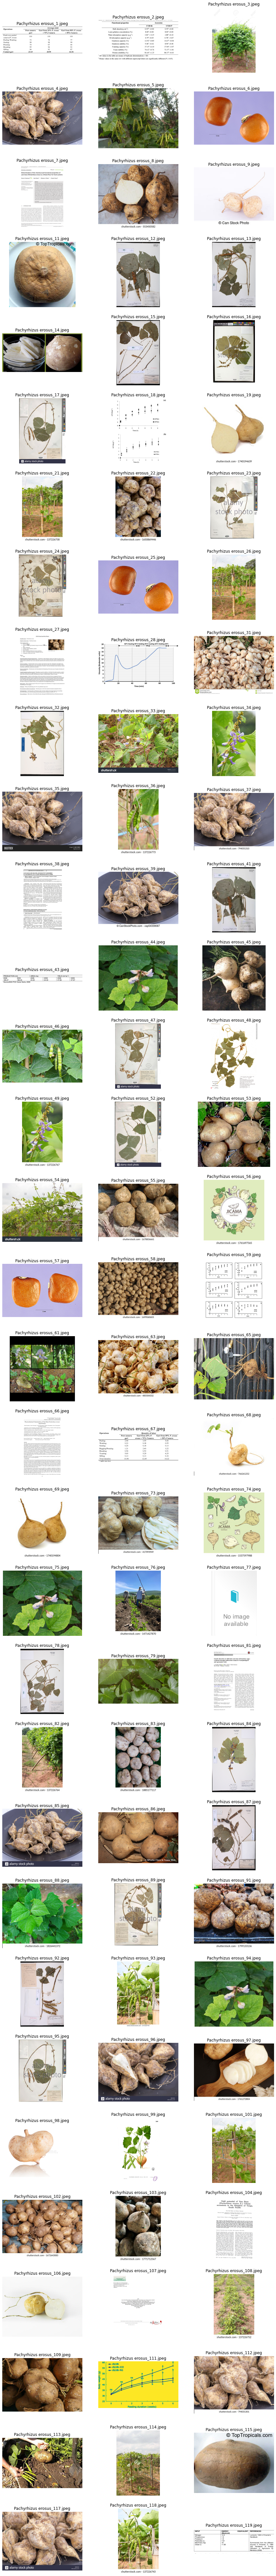

In [ ]:
# หลังจากลบรูปแล้วสามารถกดซ้ำได้เพื่อเช็คความเรียบร้อยค่ะ

import matplotlib.pyplot as plt
import PIL
%matplotlib inline

plt.figure(figsize=(15, 150))
for i, imgName in enumerate(os.listdir('/content/drive/MyDrive/Datasets/Image/'+className)) :
  #print(imgName)
  try:
    img = PIL.Image.open(os.path.join('/content/drive/MyDrive/Datasets/Image/'+className, imgName))
  except:
    print('loading image : ', imgName ,' has an error')
  plt.subplot(len(os.listdir('/content/drive/MyDrive/Datasets/Image/'+className))//3 + 1, 3, i+1)
  plt.imshow(img)
  plt.axis('off')
  plt.title(imgName.split('/')[-1])
plt.show()

In [ ]:
#rm -rf /content/drive/MyDrive/Datasets/Data/Jatropha\ podagrica\ Hook

In [ ]:
#rm -rf /content/drive/MyDrive/Datasets/Image/Jatropha\ podagrica\ Hook

In [146]:
# เช็คจากรูปที่ plot ออกมา ต้องการลบรูปไหน ใส่ index ของรูปใน list ด้านล่างเลยนะคะ
indexToDelete = [15,16,17,23,24,32,47,48,52,87,92,95,114] 

In [147]:
for idx in indexToDelete :
  imgFileName = '/content/drive/MyDrive/Datasets/Image/'+ className+'/'+className + '_'+str(idx)+'.jpeg'
  dataFileName = '/content/drive/MyDrive/Datasets/Data/'+ className+'/'+className + '_'+str(idx)+'.p'
  
  if os.path.exists(imgFileName) :
    #print(imgFileName, ' exists')
    os.remove(imgFileName)

  if os.path.exists(dataFileName) :
    #print(dataFileName, ' exists')
    os.remove(dataFileName)

# Create Dataset

In [148]:
"""
import glob
import pandas as pd
import pickle
def createdataset():
  imgfolder = glob.glob('images/*')
  for cls in imgfolder:
    clsset = pd.DataFrame()
    pList = glob.glob(cls+'/*')
    featvec = []
    dataset = []
    for p in pList:
      dat = pickle.load(open(p,'rb'))
      featvec.append(dat.resnet50)

    clsset['feature'] = featvec
    cls = cls.split('/')[-1]
    clsset['label'] = cls
    dataset.append(clsset)
"""

"\nimport glob\nimport pandas as pd\nimport pickle\ndef createdataset():\n  imgfolder = glob.glob('images/*')\n  for cls in imgfolder:\n    clsset = pd.DataFrame()\n    pList = glob.glob(cls+'/*')\n    featvec = []\n    dataset = []\n    for p in pList:\n      dat = pickle.load(open(p,'rb'))\n      featvec.append(dat.resnet50)\n\n    clsset['feature'] = featvec\n    cls = cls.split('/')[-1]\n    clsset['label'] = cls\n    dataset.append(clsset)\n"

In [149]:
"""
dataset = createdataset()
"""

'\ndataset = createdataset()\n'

In [150]:
"""
dataset
"""

'\ndataset\n'

In [151]:
"""
fimgfolder = glob.glob('images/*')
for cls in imgfolder:
  imgList = glob.glob(cls+'/*')
imgList
"""

"\nfimgfolder = glob.glob('images/*')\nfor cls in imgfolder:\n  imgList = glob.glob(cls+'/*')\nimgList\n"